<a href="https://colab.research.google.com/github/ricardoricrob76/python-graficos/blob/main/Analise_Explorat%C3%B3ria_dos_Dados_do_Navio_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Análise e Exploração de Dados do Naufragio do Titanic
# Autor: Ricardo Roberto de Lima
# Data: 06/04/2023

In [4]:
!pip install scrapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.9/272.9 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 KB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 KB 9.7 MB/s eta 0:00:00


In [3]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Importando as bibliotecas do Python
import numpy as np # Vetor e Matriz Multidimensional.
import scipy as sp # Estatística e Matemática.
import pandas as pd # Excel dentro do Colab ou seja faz tudo nele.
import matplotlib.pyplot as plt # Criar Gráficos e objetos visualização de dados.
import seaborn as sns # Criar Gráfico só que mais bonitos em HTML5. 

In [5]:
# Lendo o arquivo CSV
df_titanic = pd.read_csv("Titanic.csv")

In [9]:
# Exibindo as primeiras linhas do DataFrame Titanic
df_titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
# Exibindo as últimas linhas do DataFrame Titanic
df_titanic.tail(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
403,1295,0,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S
404,1296,0,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
406,1298,0,2,"Ware, Mr. William Jeffery",male,23.0,1,0,28666,10.5000,NaN,S
407,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S


(array([107.,   0.,   0.,   0.,  93.,   0.,   0., 218.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ]),
 <BarContainer object of 8 artists>)

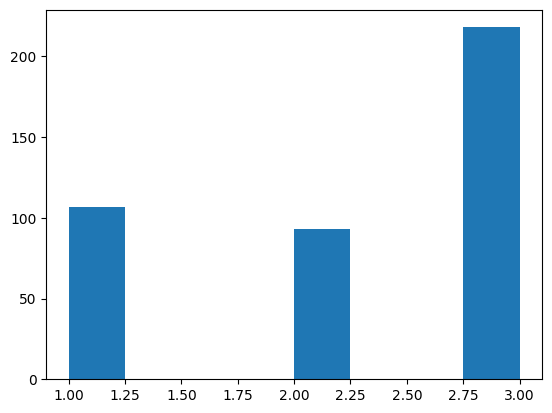

In [11]:
# Usando Matplotlib para desenhar um histogram para a coluna PClass a classe social da pessoa do titanic.
plt.hist(df_titanic['Pclass'],bins=8)

(array([ 20.,  41., 114.,  68.,  45.,  28.,  14.,   2.]),
 array([ 0.17   ,  9.64875, 19.1275 , 28.60625, 38.085  , 47.56375,
        57.0425 , 66.52125, 76.     ]),
 <BarContainer object of 8 artists>)

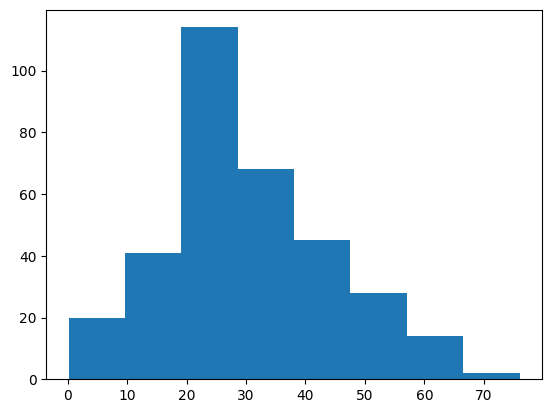

In [12]:
# Usando Matplotlib para desenhar um histAgeogram para a coluna Age Idade -  classe social da pessoa do titanic.
plt.hist(df_titanic['Age'],bins=8)

(array([266.,   0.,   0.,   0.,   0.,   0.,   0., 152.]),
 array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ]),
 <BarContainer object of 8 artists>)

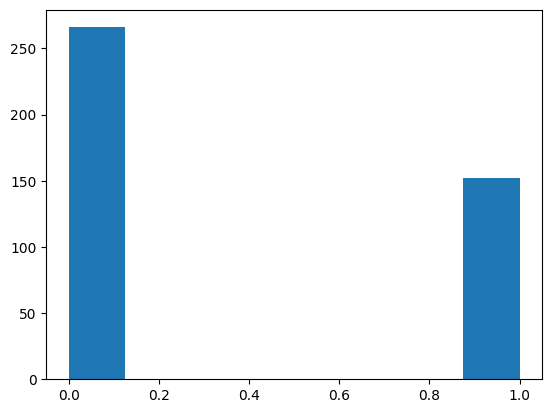

In [13]:

# Usando Matplotlib para desenhar um histAgeogram para a coluna Age Idade -  classe social da pessoa do titanic.
plt.hist(df_titanic['Survived'],bins=8)

<Axes: ylabel='Age'>

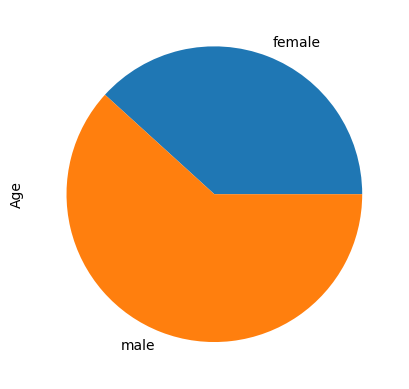

In [14]:
# O uso regular do matplotlib para mostrar o "Gráfico de Pizza" Sexo e Idade.
df_titanic.groupby(['Sex'])['Age'].count().plot(kind='pie')

<Axes: ylabel='Sex'>

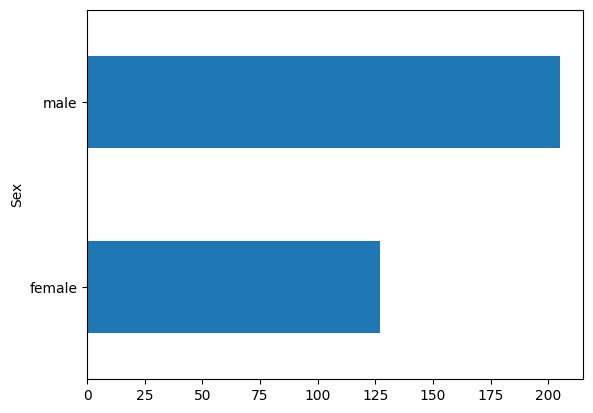

In [15]:
# O uso regular do matplotlib para mostrar o "Gráfico de Pizza" Sexo e Idade.
df_titanic.groupby(['Sex'])['Age'].count().plot(kind='barh')

/usr/local/lib/python3.9/dist-packages/seaborn/algorithms.py:76: UserWarning: Data contain nans but no nan-aware version of `size` found
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/algorithms.py:76: UserWarning: Data contain nans but no nan-aware version of `size` found
  warnings.warn(msg, UserWarning)


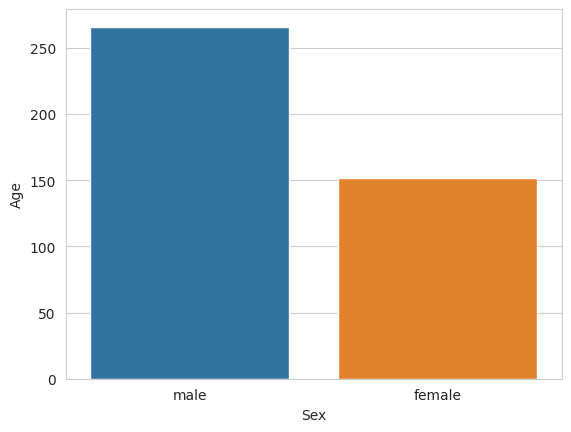

In [16]:
# O uso do seaborn para mostrar o Gráfico de Barras
sns.set_style("whitegrid")
ax = sns.barplot(x='Sex',y ='Age', data=df_titanic, estimator=len)